<a href="https://colab.research.google.com/github/dhuey2/Traffic-Sign-Prediction/blob/main/SignID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

In [2]:
# cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [3]:
# list dataset contents
!ls german-traffic-signs


signnames.csv  test.p  train.p	valid.p


In [4]:
#loading the dataset
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [5]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
#loading pickled dataset

with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [7]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [8]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


imamge label=4


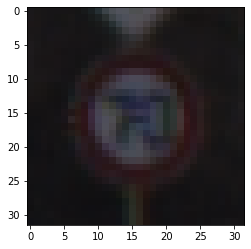

In [9]:
index = np.random.randint(1,len(x_train))
plt.imshow(x_train[index])
print("imamge label={}".format(y_train[index]))

In [10]:
#shuffle the data
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [11]:
def preprocessing(img):
  #convert to grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #apply histogram equalization
  img = cv2.equalizeHist(img)
  #Normalization
  img = img/255
  return img

In [12]:
x_train_processed = np.array(list(map(preprocessing,x_train)))
x_validation_processed = np.array(list(map(preprocessing,x_validation)))
x_test_processed = np.array(list(map(preprocessing,x_test)))

In [13]:
x_train_processed = x_train_processed.reshape(34799, 32, 32, 1)
x_validation_processed = x_validation_processed.reshape(4410, 32, 32, 1)
x_test_processed = x_test_processed.reshape(12630, 32, 32, 1)

In [14]:
print(x_train_processed.shape)
print(x_test_processed.shape)
print(x_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


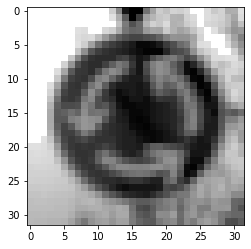

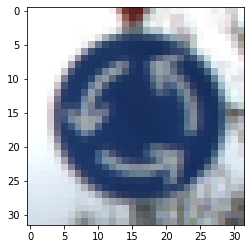

In [15]:
#image preprocess all in actionsssd
i = random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

In [16]:
model = Sequential()
#convulational layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#dropout layer
model.add(Dropout(0.25))
#add another convulational layer
model.add(Conv2D(64,(5,5),activation='relu'))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten Image
model.add(Flatten())
#Add Dense Layer
model.add(Dense(256,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))
#define output layer
model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [17]:
#compile the model
model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [18]:
history = model.fit(x_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 13s 20ms/step - loss: 3.5779 - accuracy: 0.0571 - val_loss: 3.4948 - val_accuracy: 0.1814
Epoch 2/50
70/70 [==============================] - 1s 15ms/step - loss: 3.3169 - accuracy: 0.1382 - val_loss: 3.1331 - val_accuracy: 0.3070
Epoch 3/50
70/70 [==============================] - 1s 15ms/step - loss: 2.8190 - accuracy: 0.2884 - val_loss: 2.5618 - val_accuracy: 0.3893
Epoch 4/50
70/70 [==============================] - 1s 15ms/step - loss: 2.3532 - accuracy: 0.3834 - val_loss: 2.1291 - val_accuracy: 0.4481
Epoch 5/50
70/70 [==============================] - 1s 15ms/step - loss: 2.0145 - accuracy: 0.4449 - val_loss: 1.7947 - val_accuracy: 0.5093
Epoch 6/50
70/70 [==============================] - 1s 15ms/step - loss: 1.7692 - accuracy: 0.4967 - val_loss: 1.5408 - val_accuracy: 0.5923
Epoch 7/50
70/70 [==============================] - 1s 15ms/step - loss: 1.5796 - accuracy: 0.5415 - val_loss: 1.3573 - val_accuracy: 0.6234
Epoch 8/50
7

In [19]:
model.name_scope

<bound method Layer._name_scope of <keras.engine.sequential.Sequential object at 0x7f7a2dd16fd0>>

Evaluate Performance

In [20]:
score = model.evaluate(x_test_processed,y_test)
print('Test Accuracy', score[1])

395/395 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 0.9097
Test Accuracy 0.9096595644950867


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

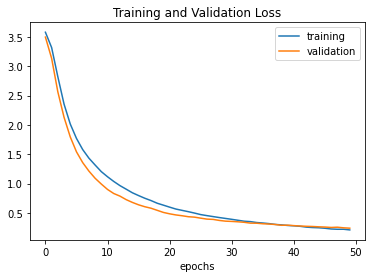

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

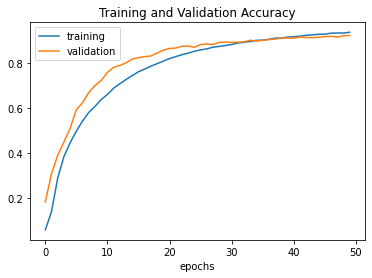

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')

In [24]:
prediction = np.argmax(model.predict(x_test_processed), axis=-1)
#np.argmax(prediction, axis=1)
#np.argmax(prediction, axis=-1)
y_true_label = y_test

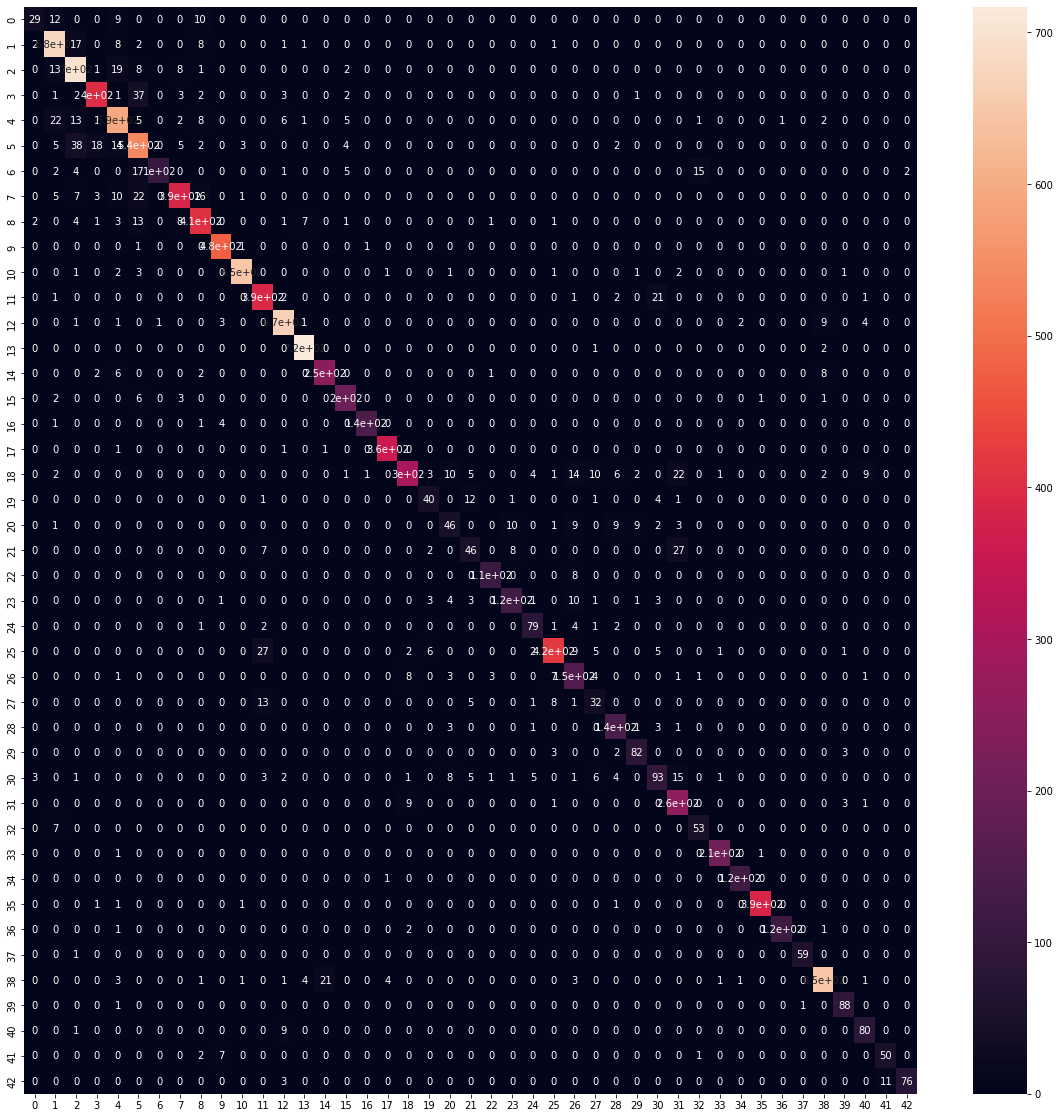

In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

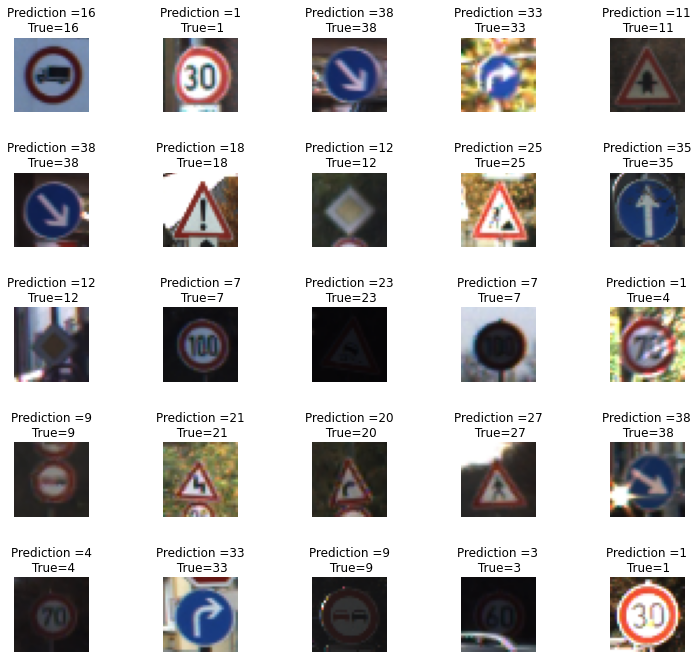

In [26]:
L=5
W=5
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [27]:
model.save('SignID_model.h5')

# Saving to pickle file

In [28]:
with open("signid.pkl", "wb") as f:
  pickle.dump(model, f)  

INFO:tensorflow:Assets written to: ram://983f511f-ffbd-4151-a06b-1b518b346f2b/assets


In [29]:
def sign_prediction(image):
  with open("signid.pkl", "rb") as f:
    prediction = pickle.load(f)
    label = model.predict(image)
    return label[0][0]


In [30]:
label = model.predict()

TypeError: ignored

# CREATING GRADIO

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
app = gr.Interface(fn = sign_prediction, inputs="image", outputs="label")
app.launch()
